CZĘŚĆ PIERWSZA

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_ds = train_ds.shuffle(1000).batch(32)

In [4]:
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(50, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004)

f_mnist_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
f_mnist_model.fit(train_ds, epochs=25, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7688 - loss: 0.6439 - val_accuracy: 0.8458 - val_loss: 0.4229
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8586 - loss: 0.3828 - val_accuracy: 0.8705 - val_loss: 0.3540
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8736 - loss: 0.3427 - val_accuracy: 0.8790 - val_loss: 0.3356
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8807 - loss: 0.3208 - val_accuracy: 0.8717 - val_loss: 0.3399
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8883 - loss: 0.2986 - val_accuracy: 0.8807 - val_loss: 0.3413
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8936 - loss: 0.2831 - val_accuracy: 0.8927 - val_loss: 0.2952
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8986 - loss: 0.2686 - val_accuracy: 0.8730 - val_loss: 0.3581
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9018 - loss: 0.2

CZĘŚĆ DRUGA

In [7]:
f_mnist_model.save('fashion_mnist_model.keras')

In [16]:
saved_model = tf.keras.models.load_model('fashion_mnist_model.keras')

In [9]:
import matplotlib.pyplot as plt

In [10]:
def predict_and_display(image):

    image = np.expand_dims(image, axis=0)

    prediction = saved_model.predict(image)
    predicted_label = np.argmax(prediction)

    plt.imshow(image.squeeze())
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


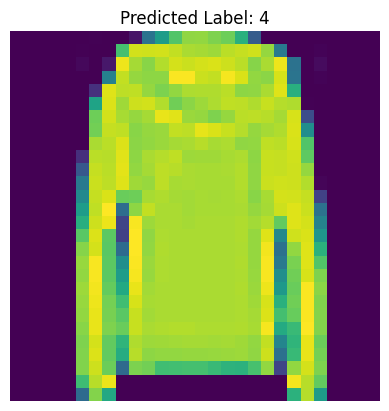

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


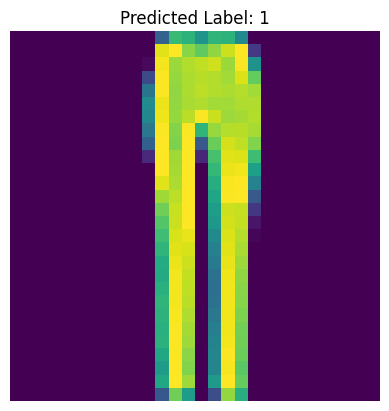

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


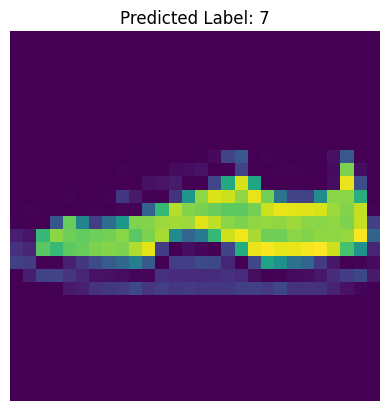

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


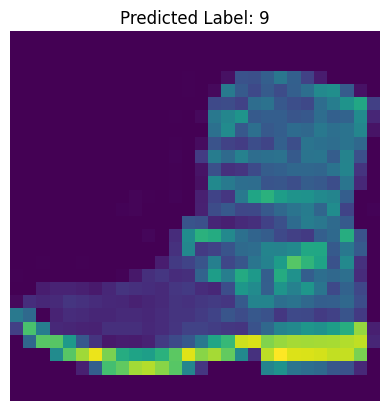

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


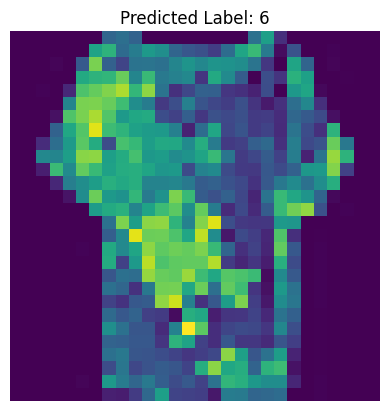

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


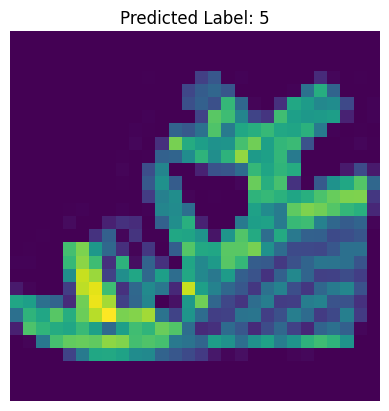

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


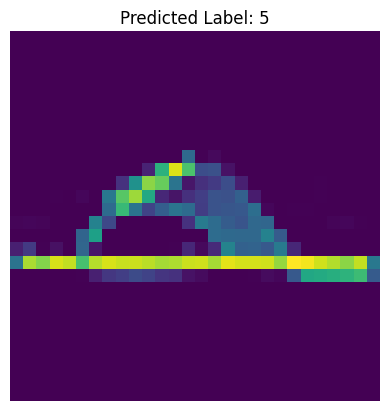

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


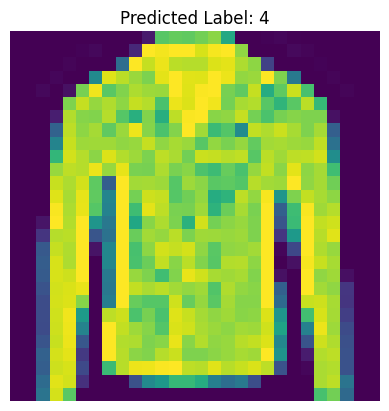

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


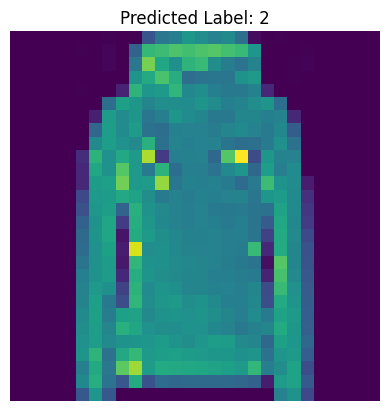

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


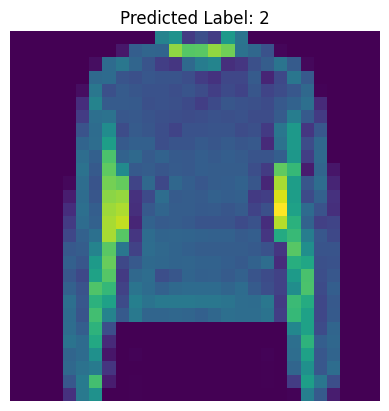

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


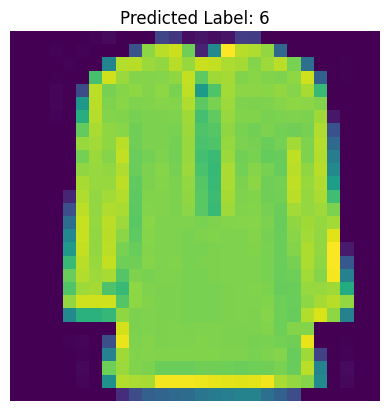

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


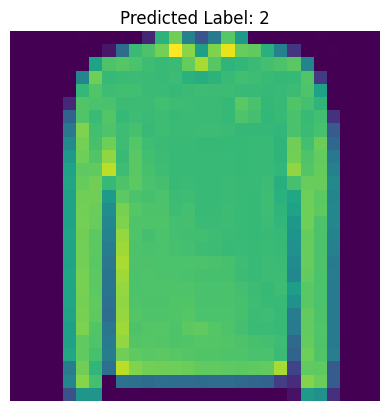

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


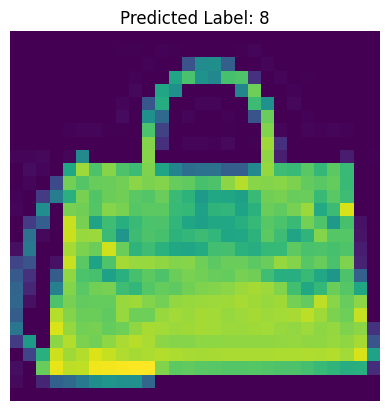

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


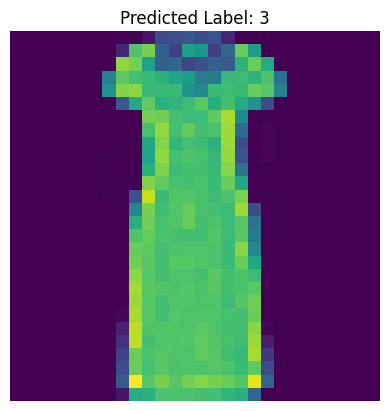

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


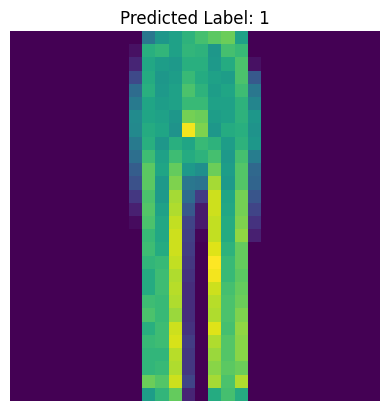

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


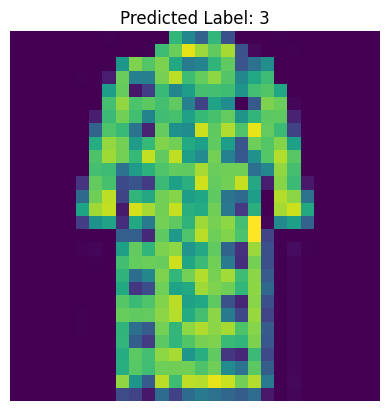

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


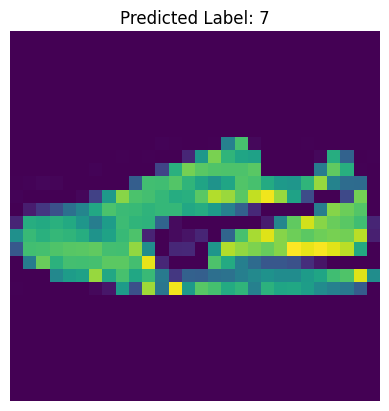

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


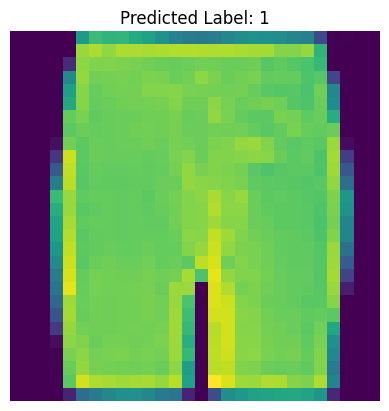

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


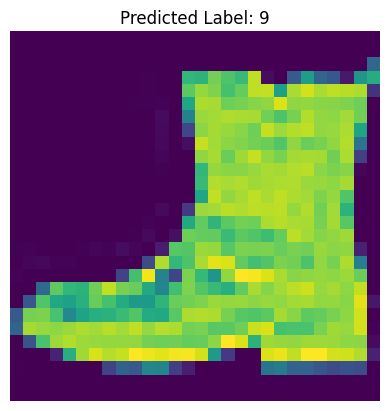

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


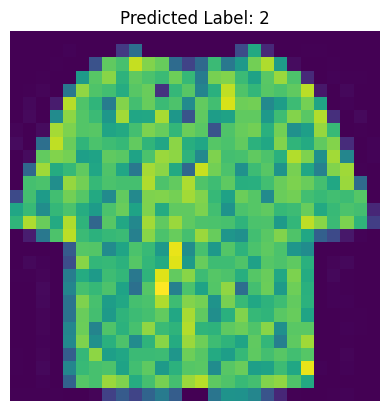

In [11]:
#Let's see the function for the first 20 test examples

for i in range(20):
    predict_and_display(X_test[i])

CZĘŚĆ TRZECIA

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=5e-6)

In [17]:
datagen = ImageDataGenerator(
    width_shift_range=0.01,
    height_shift_range=0.01,
    shear_range=0.01,
    zoom_range=0.01,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='constant')

datagen.fit(X_train)

saved_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=75, verbose=1, callbacks=[lr_scheduler])

Epoch 1/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8711 - loss: 0.4225 - learning_rate: 0.0010
Epoch 2/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8997 - loss: 0.2763 - learning_rate: 0.0010
Epoch 3/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9050 - loss: 0.2572 - learning_rate: 0.0010
Epoch 4/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9089 - loss: 0.2444 - learning_rate: 0.0010
Epoch 5/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9101 - loss: 0.2411 - learning_rate: 0.0010
Epoch 6/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9113 - loss: 0.2338 - learning_rate: 0.0010
Epoch 7/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9122 - loss: 0.2287 - learning_rate: 0.0010
Epoch 8/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9144 - loss: 0.2311 - learning_rate: 0.0010
Epoch 9/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9176 - loss: 0.217

Z wystarczającą ilością epok byłam w stanie osiągnąć accuracy 97%. Niestety, samo image augmentation nie pomogło - trzeba było dodać dużą ilość epok, jak i stworzyć learning rate scheduler. Może mieć to sens, że z większą ilością danych komputer potrzebuje więcej czasu (epok), by zrozumieć dane, lecz mimo to nie powiedziałabym, że image segmentation bardzo pomogło naszej sieci w klasyfikacji ubrań.